# News Article Classification by k-NN

## 1. Task description

We will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To handle the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

#### Brief explanation
The vocabulary is an array that includes the words in the vocabulary that is used to create these articles. And since the articles don't use all the words in the vocabulary , the `data` become sparce meaning that it contains all zero (spaces of the words that have not being used) and non-zero words (words that have actually being used in our article).This is a problem because the zero words occupy a lot of memory space . To tacle this diffculty we represent the `data` with `scipy.sparse.csr_matrix` this will hold only the non-zero value (words that have actually being used in the article).

However , since our `data` is a sparse matrix we can't access other element from other matrices. We have to convert data to a Numpy arrray (which is a normal array that hold a huge amount of data) .

Note: that when converting `data` into a normal array, the zero value will show up again the size will be huge . 

In [110]:
#print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
#The first indices represents the row and the second indices represents the column the third value is the non-zero value
#print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector (it will include the zero and the non-zero values)
#print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix (we have to turn in into an array first) --> it will result in an error
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document. (because python starts at index zero)
print(vocabulary[columns]) # Prints the words present in the 42nd document.

['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [111]:
print(", ".join(vocabulary))  #vocabulary used to create the articles

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [112]:
i, j = 40, 2 #article 41 #column 3
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [113]:
print(labels[i]) #class of article 41 belong to 0 means earn

0


For instance, by running

In [114]:
print("Occurrences:", data[0,10]) #article 1 column  (word) 11
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10]) #if you want to see the actual word we use vocabulary

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [115]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [116]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [145 284 288 449 546 553 702 761 763 704]
Samples:   (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	2
  (0, 17)	11
  (0, 19)	6
  (0, 21)	4
  (0, 22)	2
  (0, 23)	1
  (0, 24)	1
  (0, 26)	1
  (0, 30)	1
  (0, 42)	1
  (0, 99)	1
  (0, 117)	1
  (0, 122)	1
  (0, 732)	1
  (0, 924)	1
  (0, 2737)	1
  (0, 2961)	1
  (0, 3320)	1
  (0, 4807)	1
  (0, 4808)	1
  (0, 6288)	1
  (1, 5)	5
  :	:
  (8, 98)	1
  (8, 215)	1
  (8, 240)	1
  (8, 275)	2
  (8, 332)	3
  (8, 340)	1
  (8, 367)	1
  (8, 746)	1
  (8, 814)	1
  (8, 984)	3
  (8, 1229)	2
  (8, 1451)	1
  (8, 1588)	1
  (8, 2020)	1
  (8, 2284)	2
  (8, 2565)	1
  (8, 2748)	2
  (8, 2753)	1
  (8, 3165)	2
  (9, 332)	1
  (9, 456)	1
  (9, 490)	1
  (9, 668)	1
  (9, 984)	1
  (9, 1501)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN Implementation (4 Marks, Normal)

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance (defined as 1 - cosine similarity). It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to get 4 marks, you are asked to implement the k-NN classifier from scrach without relying on any machine learning library, particularly the distance calculation. But you are allowed to research NumPy functions relating to sorting. If you decide to use existing distance implementation from libraries, e.g., `sklearn.metrics.pairwise_distances` imported as `cdist`, you can get at most 3 marks.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

### Training set vs Test set:

Training set is used to trained our model on how to make predictions , it contains the input(matrix) and the output(label)

Test set (seperate set of data) is used to evaluate the performance of the model , it contains the input(matrix) but the output(label)is unknown , so we use the training tp predict the output , and compare the prediction to our true value (label)


In [117]:
import scipy.stats
def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    #checking specific metric 
    if metric == "euclidean":
        # Calculate an m x n distance matrix.
        xy = np.dot(test_samples,training_data.T)
        x = test_samples.toarray()
        y = training_data.toarray() 
        x_squared = np.sum(np.square(x),axis=1)[:,np.newaxis] #added a new axis between the row and column , now each test sample is a 2D array
        #without this new axis we can't perform element-wise operation shape is (m, 1, d)
        
        y_squared = np.sum(np.square(y), axis=1)
        pairwise_distance = np.sqrt(x_squared - 2 * xy + y_squared) #the sum accross d the resulting array has a (m, n) shape
        #shape is (n, d)
        #np.sum(x**2 - 2 * xy + y**2) creates an array of squared differences between each pair of test sample and training sample 
        #now we need to calculate the square root of the sum of the squared differences across the last axis (feature axis) (m,n,d)
        # np.sqrt(np.sum(x_squared - 2 * xy + y_squared))

         
        # # Find the k nearest neighbours of each samples as an m x k matrix of indices.
        # #to find the nearest neighbours we have to find the smallest (nearest) k distance of each test sample
        # #argsort() takes the indices of the smallest k distance of each test sample , this will result in mxk array
        # kNearest_indices = np.argsort(pairwise_distance,axis=1 ) #we want it to sort each row seperatly 
        # nearest_neighbours = kNearest_indices[:,:k] #each row containt the indices of the nearest neighbours
        
        # # Look up the classes corresponding to each index.
        # #to look up the classes you use labels[indices]
        # nearest_labels = training_labels[nearest_neighbours] #this return and mxk array where each row is a test sample and each column the class corresponding to the k nearest neighbours 
        # # Return the most frequent class on each row. (mode)
        # return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1
    
    elif metric == "cosine":
        xy = np.dot(test_samples, training_data.T)
        x = test_samples.toarray()
        y = training_data.toarray()
        
        #calculating the magnitude of x and y to help determine how similar are the data points
        x_magnitude = np.sqrt(np.sum(np.square(x), axis=1))
        y_magnitude = np.sqrt(np.sum(np.square(y), axis=1))
        xy_magnitude =  x_magnitude[:,np.newaxis] * y_magnitude[np.newaxis,:] #using broadcasting (duplicating)to perform element-wise multiplication
        #calculating the cosine similarity between x and y 
        cosine_similarity = xy / xy_magnitude #creating a new axis where each element
        #(i,j) is the product of the i-th element of x_magnitude and the j-th element of y_magnitude
        pairwise_distance = 1 - cosine_similarity

    kNearest_indices = np.argsort(pairwise_distance,axis=1 ) #we want it to sort each row seperatly 
    nearest_neighbours = kNearest_indices[:,:k] #each row containt the indices of the nearest neighbours
    
    # Look up the classes corresponding to each index.
    #to look up the classes you use labels[indices]
    nearest_labels = training_labels[nearest_neighbours] #this return and mxk array where each row is a test sample and each column the class corresponding to the k nearest neighbours 
    # Return the most frequent class on each row. (mode)
    return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1
    
        # Note: Ensure that the returned vector does not contain any empty dimensions.
        # You may find the squeeze method useful here.

## 4. Experiments (13 Marks in Total)

Use your k-NN function to perform the following experiments.

### Experiment 1 (3 Marks, Easy)

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Fix a neighbour number setting as you see fit. Perform k-NN classification using the Euclidean distance and test it.

Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies. Print out the mean and standard deviation.

In [118]:
total_mean = []
for experiment in range(20): #repeating the experiment 20 times 
    training_class_indices  = sample_indices(labels, 80,80,80,80) #randomly selecting 80 articles
    total_class_indices = sample_indices(labels,200,200,200,200) #total articles per class 
    testing_indices = np.setdiff1d(total_class_indices,training_class_indices) #calculting the remaining articles 
    training_labels = labels[training_class_indices]
    testing_labels = labels[testing_indices]
    training_data = data[training_class_indices]
    testing_data = data[testing_indices]
    knn_classification =  (knn_classify(testing_data,training_data,training_labels,metric="euclidean",k=5))
    value = (knn_classification == testing_labels) #checking the accuracy either true or false 
    mean = np.mean(value)
    total_mean.append(mean)
std = np.std(total_mean)
# print("mean:", np.mean(total_mean))
# print("standard deviation", std)
print("{:.2f} ± {:.2f} ".format(np.mean(total_mean), std))


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


0.87 ± 0.03 


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

Print out the mean and standard deviation.

In [119]:
total_mean = []
for experiement in range(20): 
    training_class_indices  = sample_indices(labels, 80,80,80,80)
    total_class_indices = sample_indices(labels,200,200,200,200)
    testing_indices = np.setdiff1d(total_class_indices,training_class_indices)
    training_labels = labels[training_class_indices]
    testing_labels = labels[testing_indices]
    training_data = data[training_class_indices]
    testing_data = data[testing_indices]
    knn_classification =  (knn_classify(testing_data,training_data,training_labels,metric="cosine",k=5))
    value = (knn_classification == testing_labels)
    mean = np.mean(value)
    total_mean.append(mean)
std = np.std(total_mean)
# print("mean:", np.mean(total_mean))
# print("standard deviation", std)
print("{:.2f} ± {:.2f} ".format(np.mean(total_mean), std))
 
    

C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


0.96 ± 0.01 


Explain in your report which distance measure gives better performance and analyse the reason. 

### Which distance measure is better and why?

Euclidean distance measures the straight-line distance between 2 data points in euclidean space. 
The magnitude or size of the data points heavily influences this distance metric. For example, when comparing two vectors with different sizes, one with a large number and one with a small number, the euclidean distance would be very large because they have different sizes.

However, the cosine distance, on the other hand, measures the angle between these 2 data points. It focuses on the orientation instead of the magnitude. If the two vectors point in the same direction, they are the same. If they are pointing in a different directions, they are not the same. It is better when we want to consider the direction of the two vectors that have different magnitudes.
Hence cosine distance performs better than euclidean distance, especially when dealing with sparse data, like text data in our experiment. 

### Experiment 2 (5 Marks, Easy)

Using the distance measure that you found performs better in Experiment 1.

Randomly select 80 articles per class for training, and use the remaining articles for testing. Perform k-NN classification with the neighbour number $k$ varying from 1 to 50.

For each values of $k$, repeat the training process by 20 trials and record the average training error rates and standard deviation.

Do the same for testing errors.

In [120]:
#expirementing on the cosine distance metric (better)
training_error = [] #the error rate that we get when we compare the predicted output labels with the actual output on our training data
testing_error = [] #how well a model performs on new unseen data.
training_std = []
testing_std = []
for k_value in range(1,51): #performing K-NN with neighbour number from 1 to 50 to improve it's accuracy
    current_testing_mean = [] 
    current_training_mean = []
    for experiement in range(20): #repeating experiment 20 times
        total_class_indices = sample_indices(labels,200,200,200,200)

        training_class_indices  = sample_indices(labels, 80,80,80,80) #randomly selecting 80 articles
        training_labels = labels[training_class_indices]
        training_data = data[training_class_indices]
        knn_classification_training =  knn_classify(training_data,training_data,training_labels,metric="cosine",k=k_value)

        testing_indices = np.setdiff1d(total_class_indices,training_class_indices) #using remaining articles for testing
        testing_labels = labels[testing_indices]
        testing_data = data[testing_indices]
        knn_classification_testing =  knn_classify(testing_data,training_data,training_labels,metric="cosine",k=k_value)

        training_mean = np.mean(knn_classification_training == training_labels)
        current_training_mean.append(training_mean)
        

        testing_mean = np.mean(knn_classification_testing == testing_labels)
        current_testing_mean.append(testing_mean)
        

    training_std.append(np.std(current_training_mean))
    testing_std.append(np.std(current_testing_mean))
    training_error.append(1 - np.mean(current_training_mean))
    testing_error.append( 1 - np.mean(current_testing_mean))
    print("k= {}".format(k_value))
    print("training error rates: {:.2f} ± {:.2f} ".format(np.mean(training_error), np.mean(training_std)))
    print("testing error rates: {:.2f} ± {:.2f} ".format(np.mean(testing_error), np.mean(testing_std)))
 


print("average training error rates: {:.2f} ± {:.2f} ".format(np.mean(training_error), np.mean(training_std)))
print("average testing error rates: {:.2f} ± {:.2f} ".format(np.mean(testing_error), np.mean(testing_std)))
 
    


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


k= 1
training error rates: 0.00 ± 0.00 
testing error rates: 0.03 ± 0.01 
k= 2
training error rates: 0.01 ± 0.00 
testing error rates: 0.04 ± 0.01 
k= 3
training error rates: 0.01 ± 0.00 
testing error rates: 0.04 ± 0.01 
k= 4
training error rates: 0.01 ± 0.00 
testing error rates: 0.04 ± 0.01 
k= 5
training error rates: 0.02 ± 0.00 
testing error rates: 0.04 ± 0.01 
k= 6
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 7
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 8
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 9
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 10
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 11
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 12
training error rates: 0.02 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 13
training error rates: 0.03 ± 0.01 
testing error rates: 0.04 ± 0.01 
k= 14
training error rates: 0.03 ±

Produce an error bar plot showing the training error rate for each $k$ here:

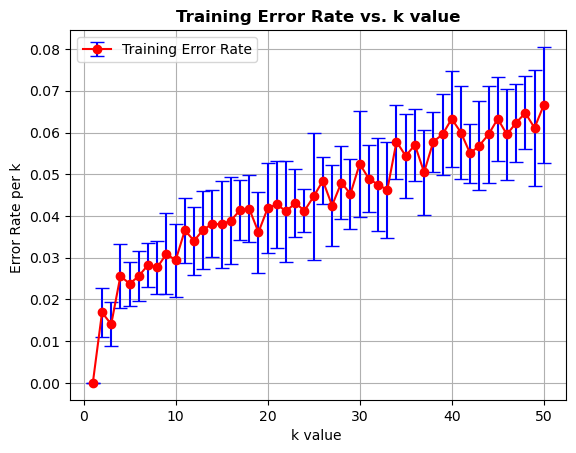

In [121]:
k_value = list(range(1,51))
plt.errorbar(k_value, training_error, yerr=training_std, 
             capsize=5, fmt='-o', color='red',ecolor='blue',label='Training Error Rate')
plt.xlabel('k value ')
plt.ylabel('Error Rate per k ')
plt.title('Training Error Rate vs. k value', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

Produce your testing error bar plot here:

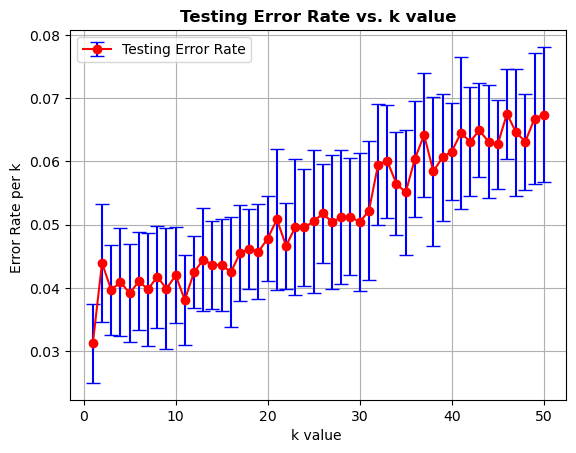

In [122]:
k_value = list(range(1,51))
plt.errorbar(k_value, testing_error, yerr=testing_std, 
             capsize=5, fmt='-o', color='red',ecolor='blue',label='Testing Error Rate')
plt.xlabel('k value ')
plt.ylabel('Error Rate per k ')
plt.title('Testing Error Rate vs. k value', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

**Remember that all graphs should have axis labels and a title.**

Discuss in your report the difference between the training and testing accuracies, and why this is the case. 

Analyse in your report the effect of $k$ based on this experiment. What do you think is a reasonable value for $k$? Comment specifically on the *bias* and *variance* of your model at small and large values of $k$.

This experience indicate that there is a slight difference between the training accuracy and the testing accuracy. The training accuracy here is greater than the testing accuracy for all values of k (1-50). This behaviour is called overfitting, this happens when the model learns the training data too well and fails to generalise to new, unobserved data. This suggests that the model is not doing well on new data,which is a crutial indicator for judging the model's effectiveness. In order to make the model perform well on new data and prevent overfitting , we need to chose the most suitable value for k. 
Analysing the behaviour of k: the model has a low bias but large variance at small values of k, this is caused by overfitting. However, the bias increases and the variance decrease for large values of k. This is because assigning large k neighbours to the model creating a low variance.
Choosing the right value for k: choosing a small value for k like 1 would cause overfitting and choosing a large value og k would cause increase in bias. A good value for k would be in the range of 7-10. This balances the variance and bias. It can be concluded from the experiment that the k-NN algorithm can be significant;y impacted by the chose of k value.

### Experiment 3 (5 Marks, Hard)

In this experiment we will create confusion matrices for a more detailed view on our model's performance. Then, we will observe the behaviour of our knn classifier on novel classes.

First, randomly select 100 articles per class for training, and use the remaining articles for testing. Set the neighbour number to $k=3$. Perform 3-NN classification using the Cosine distance, as in previous experiments.

#### Confusion Matrix Implementation  

Implement a multi-class confusion matrix yourself, from scratch. Let the row index correspond to the known label, and column index to predicted label. If you decide to use existing confusion matrix implementation from libraries, e.g., `sklearn.metrics.confusion_matrix`, you can get at most 4 marks. (However, you may use an existing implementation to check the output of your own function.)

Print out the confusion matrix and overall accuracy of your classifier for the testing data.

In [123]:
#a confusion matrix is a table that compares the anticipated and actual labels 
#for a set of test data to assess the effectiveness of a classification model.
#diagonal elements represent the instances for each class that were classified correctly 
#and the off-diagonal elements represent the number instances that were classified incorrecty

total_class_indices = sample_indices(labels,200,200,200,200)
training_class_indices  = sample_indices(labels, 100,100,100,100) #randomly selecting 80 articles
testing_indices = np.setdiff1d(total_class_indices,training_class_indices) #using remaining articles for testing
training_data = data[training_class_indices] #extracting the training data from the data set using training class indices 
testing_data = data[testing_indices] #extracting the testing data from the data set using training class indices 
true_label_array = labels[testing_indices] #true value array
training_labels = labels[training_class_indices]

predicted_label_array = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=3) #predicted value
num_classes = len(np.unique(true_label_array)) #number of classes

cm = np.zeros((num_classes, num_classes)) #initializing the confusion matrix nxn where n is the length of the true label array

# Compute the confusion matrix by iterating through each element of the true label array and utilising it to update the associated element in the confusion matrix
for i in range(len(true_label_array)):
    cm[true_label_array[i], predicted_label_array[i]] += 1

confusion_matrix = cm
accuracy = np.sum(np.diagonal(confusion_matrix)) / np.sum(confusion_matrix) #adding the correctly classifies instances / overall instances

print("Confusion Matrix:\n",confusion_matrix)
print("Accuracy: {:.2f}".format(accuracy))






Confusion Matrix:
 [[99.  0.  0.  1.]
 [ 1. 97.  0.  2.]
 [ 3.  1. 95.  1.]
 [ 0.  1.  0. 99.]]
Accuracy: 0.97


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


#### On Novel Classes

5 new articles have been provided in string format below. The code to create a sparse representation of these articles has also been provided. Take a moment to skim through the articles.

Run the code below, saving the sparse matrix representation of these 5 articles into `new_data`.

In [124]:
sp0 = """World number four Jessica Pegula said she thought about ending her tennis career prematurely last year due to her mother Kim's health issues.
Kim, the co-owner and president of the NFL's Buffalo Bills and NHL's Buffalo Sabres, suffered a cardiac arrest in June and needed CPR from her other daughter Kelly before paramedics arrived and restored her heartbeat.
Pegula received the news after returning home to Florida from the French Open, where she lost to eventual champion Iga Swiatek but rose to number eight in the world.
"Suddenly I went from, 'Let's celebrate top 10 in the world' to, 'Do I need to start thinking about my career after tennis a lot sooner than I thought?'" Pegula wrote in an essay in The Players' Tribune.
"I'm 28 and I take pride in being able to handle every situation thrown at me, but this was a lot."
Pegula said she wanted to share her mother's story after Bills safety Damar Hamlin suffered a cardiac arrest during an NFL game last month.
Pegula went on to play Wimbledon and the U.S. Open last year to reach a career-high ranking of number three.
"I still wanted to play Wimbledon if I knew my mom was O.K.," Pegula wrote. "My dad didn't want me to play, but I knew she would be upset if I skipped because of her.
"I had to deal with a lot of speculation and questions surrounding her health, even shutting down rumours that she had died," added Pegula, who lost to Victoria Azarenka in the quarter-finals of this year's Australian Open.
"It wasn't necessarily the most fun Wimbledon experience I remember. I had a few good wins, and I was proud I was able to go out and compete considering the situation." """

sp1 = """Juventus outclassed Salernitana 3-0 on Tuesday in Serie A, with two goals and one assist from striker Dusan Vlahovic helping the visitors move up to 10th place in the standings. The game marked a return to form for Serbian Vlahovic, who has struggled with injuries this season, but made his first league start since October. 
"You can see physically, he just moves better, looks sharper, he also played well on a technical level today," Juventus manager Massimiliano Allegri told DAZN.
Juventus got a penalty after 26 minutes when Hans Nicolussi fouled Manuel Locatelli inside the box with Vlahovic converting the penalty.
Vlahovic almost netted a second in the 37th minute, but his shot from an acute angle at the edge of the box went just wide of the post.
Filip Kostic doubled the lead on the stroke of halftime when he tapped the ball in from close range after Vlahovic's initial shot bounced into his path, providing an unintended assist.
Juventus could have scored a third in the last seconds before the break when Locatelli made a run unmarked into the box, but Salernitana keeper Guillermo Ochoa reacted early and parried his attempted lob.
Vlahovic got his second goal 80 seconds into the second half when he ran through in the box and smashed the ball low into the right corner.
Salernitana almost pulled one back in the 51st minute, with Junior Sambia sending a cross that went through almost everyone in the box, but forward Boulaye Dia was unable to stretch himself in time to guide the ball into the open net.
"The team gave a strong response, we had a good 60 minutes, but got a bit complacent after going 3-0 up and allowed too many shots on goal. We were static in our positions, didn't move around enough and the players know we must absolutely do better," Allegri said.
"The first 10 minutes we tended to pass it too much down the right, so we need to improve our passing, be smoother and keep it simple."
Juve could have added to their tally but were denied by the woodwork with Angel Di Maria hitting the crossbar after 53 minutes and Moise Kean striking the post late on.
The result moved Juventus on to 26 points from 21 matches, while Salernitana are 16th with 21 points." """

sp2 = """Manchester United manager Erik ten Hag said he has a long-term plan to build a culture and to develop players at the club.
United appointed Ten Hag in April 2022 to succeed interim boss Ralf Rangnick.
The team sit third in the Premier League, eight points behind leaders Arsenal, and have the chance to win their first trophy since 2017 when they face Newcastle United in the League Cup final on Feb. 26.
"I always think about the long term, in every club where I was, I have been thinking about long-term work to build a culture, to build a way of playing, to develop the players and the team, obviously," Ten Hag told reporters.
"I think in the long term obviously in contracts and in (transfer) windows because I think that is the (right) way.
"I am not here for one year, I am (here for) longer, I see it is a long-term project to build here and how long it is you can't see, I can't tell," he added."""

sp3 = """A near-historic Philadelphia Eagles pass rush will face the ultimate test on Sunday in Kansas City Chiefs quarterback Patrick Mahomes, an MVP favourite with no interest in ceding the Super Bowl spotlight.
The Eagles established themselves as a terrifying defensive force in the regular season, punishing opponents with an astonishing 70 sacks, two shy of the NFL record, while allowing the second-fewest yards per game.
But Mahomes is unlike any quarterback they faced in 2022.
"Mahomes is the guy that extends the plays and drops the dimes," defensive end Brandon Graham, who helped the Eagles to the Lombardi Trophy five years ago, told reporters on Tuesday.
"You've got to make sure you can hit him, get him on the ground, create turnovers, make him make bad throws."
At just 27-years-old Mahomes has already vaulted himself into the history books, joining future Hall of Famer Drew Brees this year as one of only two quarterbacks to throw for more than 5,000 yards and 40 or more touchdowns in multiple seasons.
Eagles linebacker Haason Reddick produced a career-best 16 sacks this season but had few answers when asked how the Eagles could contain Mahomes.
"When it comes to Patrick Mahomes, man, he's a tremendous talent," he told reporters this week.
"I don't know if you can contain him - I just don't know, he's that good. I won't lie, he is."
Not even injury appeared to hold back Mahomes in the postseason, when he played in the AFC title match against the Cincinnati Bengals just eight days after suffering a high ankle sprain in the Chiefs' divisional round win.
With the game tied and seconds left on the clock in the fourth quarter, he produced a heroic sprint that ultimately helped put kicker Harrison Butker within range.
"I know he was hurting - I know that. He's so mentally tough," head coach Andy Reid told reporters at the Super Bowl Opening Night on Monday. "That run that he made at the end, that was the fastest he's run all year."
Cornerback James Bradberry said that it would take everything in the Eagles arsenal to stop Mahomes from collecting his second Super Bowl ring.
"You just have to be aware of how dominant he can be. You want to make sure you can contain him, eliminate what he's able to do," he told reporters on Tuesday.
"You just want to make sure you put guys in his face. That's what our defensive line has been doing all year." """

sp4 = """Los Angeles Lakers forward LeBron James surpassed Kareem Abdul-Jabbar to become the NBA's all-time leading scorer on Tuesday, setting the new mark with a fadeaway jumpshot late in the third quarter of a home game against the Oklahoma City Thunder.
'King James', who entered the game needing 36 points to break Abdul-Jabbar’s record of 38,387, sent the sold-out crowd into a frenzy when the ball splashed through the net, raising his arms in triumph as his team mates embraced him.
Lakers great Abdul-Jabbar, who took the title from Wilt Chamberlain with his signature skyhook on April 5, 1984, sat courtside at Tuesday's game and stood to applaud James after the record was broken.
Play was stopped to recognize the achievement and to let James address the crowd.
"I just want to say thank you to the Laker faithful, you guys are one of a kind," James said.
"To be able to be in the presence of such a legend as Kareem is unbelievable, it's very humbling. Please give a standing ovation to 'The Captain.'"
Tributes from his family, U.S. President Joe Biden and students from his "I Promise School" were played inside the arena, while NBA Commissioner Adam Silver told Reuters it was an "historic moment".
"These types of significant milestones capture the attention of not only basketball fans but broader society," Silver said.
"LeBron's pursuit of the scoring record is no exception and billions of people will become aware of this milestone."
All season long it has been a question of when, not if, James would topple the record. Some thought it may come during Thursday's home game against Milwaukee but James had other ideas.
Arriving at the arena in a jet black suit, black shirt and dark sunglasses, James looked like he was going to a funeral.
Hours later, he buried Abdul-Jabbar's record.
A deafening roar greeted him during the pre-game introductions and another came when he buried a three-pointer five minutes into the opening quarter for his first points of the night.
He cut the number he needed to single digits on a straightway three in the second half that sent fans leaping from their seats before the 21-foot, history-making bucket arrived with 10 seconds remaining in the third quarter.
"It's so surreal, because it's something I never made a goal of mine or something I set out to do," James said after the game. "It just happened."
Drafted into the league as a teenager, the Akron, Ohio native has more than delivered on the massive expectations put on his broad shoulders at a young age.
A versatile forward, he helping usher in the era of position-less basketball, winning four titles with three different teams, four MVP awards and four Finals MVP awards.
James sits top of the regular season points list followed by Abdul-Jabbar with Utah Jazz great Karl Malone (36,928), late Lakers legend Kobe Bryant (33,643) and Chicago Bulls icon Michael Jordan (32,292) rounding out the top five.
"When I read about the history of the game I never thought that this record would ever be touched," James said.
"I just didn't think nobody would have that type of longevity to come out on the floor and play at that level for so long.
"So it's just a complete honor to be a part of this league, to be a part of some of the greats that have ever played this game and to be right at the apex with them."
Last month, the 38-year-old was named to a record-tying 19th All Star game, a mark also held by Abdul-Jabbar.
"For sure I know I can play a couple more years," James said.
"The way I'm feeling, the way my body has been reacting to me throughout the course of this season, I know I can play a couple more years.
"It's all about my mind. My mind is still into it and I am still motivated to go out and try to compete for championships because I feel like that's what I can still do."
Despite James' historic night, the Lakers fell 133-130 to the Thunder and are now 25-30 on the season."""

In [125]:
# Make sure you have scikit-learn installed. 
from sklearn.feature_extraction.text import CountVectorizer

articles = []
for f in [sp0, sp1, sp2, sp3, sp4]:
    text = f.replace('\n', ' ')
    articles.append(text)
vrizer = CountVectorizer(vocabulary=vocabulary)
new_data = vrizer.fit_transform(articles)


(1) Run the classifier from step (1) to predict the classes of the articles in `new_data`. Print out the class predictions.

What classes to you think these 5 articles should belong to, based on your own judgement of their content? Can your classifer make an appropriate class prediction for these 5 articles? Analyse the reason for your answers in your report.

I don't believe that any of these 5 articles belong to any of the 4 classes. 

The k-NN classsifier is trained based on the data that is provided on our training data set which includes the 4 classes and the 200 articles that are associated with that class. Based on the result of Experiment 2 , when k has a low value, a value of 3 in this case, it will cause the problem of overfitting and an increase of the variance. This is caused by the model classifying the text based on the limited amount of neighbours. This results on the classifier not being able to make an appropriate class prediction for these 5 articles.

In [126]:
knn_classification =  (knn_classify(new_data,data,labels,metric="cosine",k=3))
predicted_labels = knn_classification
predicted_class_names = []
for i in predicted_labels:
    predicted_class_names.append(class_names[i])
print("Predicted class labels:",predicted_labels)
print("Predicted class name:",predicted_class_names)
# rows, columns, values = scipy.sparse.find(new_data[:]) # Find the non-zero entries in the 42nd document. (because python starts at index zero)
# #print(vocabulary[rows])
# \
# # rows, columns, values = scipy.sparse.find(new_data[1,:]) # Find the non-zero entries in the 42nd document. (because python starts at index zero)
# # print(vocabulary[columns]) 
# # rows, columns, values = scipy.sparse.find(new_data[2,:]) # Find the non-zero entries in the 42nd document. (because python starts at index zero)
# # print(vocabulary[columns])
# # rows, columns, values = scipy.sparse.find(new_data[4,:]) # Find the non-zero entries in the 42nd document. (because python starts at index zero)
# # print(vocabulary[columns])  


Predicted class labels: [1 1 3 2 0]
Predicted class name: ['crude', 'crude', 'interest', 'trade', 'earn']


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


(2) Introduce a new class, `sport`, to your dataset. The class should contain the 5 articles as above. Add this to your data using the command below. Your new data contains 805 articles, 800 from the original dataset and 5 from the `new_data`, belonging to 5 classes: 200 articles from each of the first 4 classes and 5 articles from the 5th class.

Randomly split the new data into a training set containing **100 articles each from 'earn', 'crude', 'trade', and 'interest', and then only 3 articles from 'sport'** (you should be able to use the `sample_indices` function given at the start). Reserve the remaining articles for testing. Test the performance of the new 3-NN classifier.

Print the confusion matrix and classification accuracy for the testing data.

In [127]:
data_augmented = scipy.sparse.vstack((data, new_data)) #adding a new class sport in our data
#len(data_augmented.toarray())) #it should be 805
#creating the sport label

#since sport label is the fourth label and the sport class have 5 articles we can do it this way
sport_label = [4] * 5
new_labels = np.array(sport_label) #converting the list into a numpy array to concatenate it with our data
labels_augmented = np.concatenate((labels, new_labels))

total_class_indices = sample_indices(labels_augmented,200,200,200,200,5) 

#training sample
training_class_indices  = sample_indices(labels_augmented,100,100,100,100,3) #randomly selecting 80 articles
training_labels = labels_augmented[training_class_indices]
training_data = data_augmented[training_class_indices]

#testing sample
testing_indices = np.setdiff1d(total_class_indices,training_class_indices) #using remaining articles for testing
testing_data = data_augmented[testing_indices]

#confusion matrix 
predicted_label_array = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=3) #predicted value
true_label_array = labels_augmented[testing_indices]
num_classes = len(np.unique(true_label_array)) #number of classes


cm = np.zeros((num_classes, num_classes)) #initializing the confusion matrix nxn where n is the length of the true label array

# Compute the confusion matrix by iterating through each element of the true label array and utilising it to update the associated element in the confusion matrix
for i in range(len(true_label_array)):
    cm[true_label_array[i], predicted_label_array[i]] += 1

confusion_matrix = cm
accuracy = np.sum(np.diagonal(confusion_matrix)) / np.sum(confusion_matrix) #adding the correctly classifies instances / overall instances

print("Confusion Matrix:\n",confusion_matrix)
print("Accuracy: {:.2f}".format(accuracy))






Confusion Matrix:
 [[94.  0.  2.  4.  0.]
 [ 1. 95.  1.  3.  0.]
 [ 1.  1. 98.  0.  0.]
 [ 1.  0.  3. 96.  0.]
 [ 0.  1.  0.  0.  1.]]
Accuracy: 0.96


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


(3) Repeat the above process 6 times, repeating the random train-test split. For each of the 5 classes, print out its averaged testing accuracy. Comment on your classifier's performance in your report. What are the consequences of having no training data and limited training data for the 'sports' class? 

It is expected that the "sports" classifier will perform worse than the other classes in this category because there are only three training examples for this class. Due to the classifier's limited exposure to the sports class, it is more difficult to correctly categorise fresh samples because it has less data to work with. In general, bias models of some  classes, such as the sports class in our experiment, can originate from data that is unbalanced and includes very few samples.

In [128]:
total_accuracy = []
class1 = []
class2 = []
class3 = []
class4 = []
class5 = []
for experiement in range(6):
    total_class_indices = sample_indices(labels_augmented,200,200,200,200,5) 
    #training sample
    training_class_indices  = sample_indices(labels_augmented,100,100,100,100,3) #randomly selecting 80 articles
    training_labels = labels_augmented[training_class_indices]
    training_data = data_augmented[training_class_indices]

    #testing sample
    testing_indices = np.setdiff1d(total_class_indices,training_class_indices) #using remaining articles for testing
    testing_data = data_augmented[testing_indices]

    #confusion matrix 
    predicted_label_array = knn_classify(testing_data, training_data, training_labels, metric="cosine", k=3) #predicted value
    true_label_array = labels_augmented[testing_indices]
    num_classes = len(np.unique(true_label_array)) #number of classes


    cm = np.zeros((num_classes, num_classes)) #initializing the confusion matrix nxn where n is the length of the true label array

    # Compute the confusion matrix by iterating through each element of the true label array and utilising it to update the associated element in the confusion matrix
    for i in range(len(true_label_array)):
        cm[true_label_array[i], predicted_label_array[i]] += 1
    
    confusion_matrix = cm

    class1.append(confusion_matrix[0][0]/100)
    class2.append(confusion_matrix[1][1]/100)
    class3.append(confusion_matrix[2][2]/100)
    class4.append(confusion_matrix[3][3]/100)
    class5.append(confusion_matrix[4][4]/2)
    accuracy = np.sum(np.diagonal(confusion_matrix)) / np.sum(confusion_matrix) #adding the correctly classifies instances / overall instances
    total_accuracy.append(accuracy)

print("class 1 average accuracy: {:.2f}".format(np.mean(class1)))
print("class 2 average accuracy: {:.2f}".format(np.mean(class2)))
print("class 3 average accuracy: {:.2f}".format(np.mean(class3)))
print("class 4 average accuracy: {:.2f}".format(np.mean(class4)))
print("class 5 average accuracy: {:.2f}".format(np.mean(class5)))
print("Average accuracy: {:.2f}".format(np.mean(total_accuracy)))

C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


class 1 average accuracy: 0.97
class 2 average accuracy: 0.96
class 3 average accuracy: 0.96
class 4 average accuracy: 0.96
class 5 average accuracy: 0.50
Average accuracy: 0.96


(4) Self-learn the concepts of zero-shot learning and few-shot learning. In your report, link these concepts to the experiments you've just performed. Is your model performing zero- or few-shot learning? Explain your reasoning. 

Zero-shot learning enables the model to recognise new objects that it has never seen before. This happens by giving the model some information about these object. During classification, when the model encounters something is has never seen before it utilizes the information that is already in its data to classify the object. 

However, few-shot learning is a type of learning where the model in trained to recognise new objects or classes using only the limited training data provided. This model in this learning is able to learn new concepts from the small amount of data provide by employing transfer learning techniques.

In this experiment the model uses a few-shot learning. This is due to the fact that only 5 articles are being used to train the model to be able to classify the "sport" class. The model uses transfer learning techniques to be able to this new "sport" class from the limited samples given. 

## 5. Result Analysis (4 Marks in Total)
### Analysis 1 (2 Marks, Normal)
Choose a training-testing trial in Experiment 2 for $k=1$. Observe the testing error of this 1-NN, and estimate the interval where its true error lies with 90% probability. Explain in your report how you compute it.

The confidence interval in a range of numbers that help us determine the performance of our classifying algorithm. It give us a representation of how much the computer's performance when we run the expiremence multiple times each time choosing a random set of text to classify. In our expirement we are testing the range of the computer's error rates based on the outcome of the classification algorithm. The upper bound and lower bound are computed to determine the best case scenario and the worst case scenario that the test error lies between. So the 90% confidence interval lies between the upper bound and the lower bound. This means that when repeating the procedure many times the test error of the expirement falls between the upper bound and lower bound.
Method: First , we choose a trainning-testing trial for Experiment 2 and set k = 1. I sampled 200 samples for each of the 4 classes and split 80 samples from each class for training and the remaining for testing and calculated the true testing error for the 1-NN classifier for the 90% probability. Second, I used the boostrap method for resampling the testing data set with replacement and I calculated the testing error for each of these ressampled data. This method is repeated mutiple times to estimate the confidence interval using the distribution of testing error rates. In the code, I randomly sampled 1000 indices and computed the testing error for each index using the 1-NN classifier with the cosine distance metric, each testing error that was computed was store in the testing error array. To compute the confidence interval of the 90% probability the mean and standard deviation is computed of the testing error array using the formula 
margin_error = 1.64* standard deviation/square root of number of samples #estimating the true error. The z-score of 1.64 was chosen because of the 90% probability. Lastly, the lower bound and upper bound of the confidence interval was computed to conclude that the true testing error of the 1-NN classifier is between the upper bound and the lower bound


In [129]:
total_class_indices = sample_indices(labels,200,200,200,200)

training_class_indices = sample_indices(labels, 80,80,80,80)
training_labels = labels[training_class_indices]
training_data = data[training_class_indices]

testing_indices = np.setdiff1d(total_class_indices,training_class_indices)
testing_labels = labels[testing_indices]
testing_data = data[testing_indices]

knn_classification = knn_classify(testing_data,training_data,training_labels,metric="cosine",k=1)

testing_error = 1 - np.sum(knn_classification == testing_labels)/len(knn_classification)

#sampling 1000 samples
# num_samples = 30
# testing_errors = np.zeros(num_samples)

# for i in range(num_samples):
#     # choosing a random index withing the length of the test indices
#     sample_indices = np.random.choice(testing_indices, size=len(testing_indices), replace=True)
#     sample_data = data[sample_indices]
#     sample_labels = labels[sample_indices]
#     # compute testing error for the specified sample
#     knn_classification = knn_classify(sample_data, training_data, training_labels, metric="cosine", k=1)
#     testing_error = 1 - np.sum(knn_classification == sample_labels)/len(knn_classification)
#     testing_errors[i] = testing_error #appending to array testing_errors

# mean_testing_error = np.mean(testing_errors)
# std_testing_error = np.std(testing_errors)
confidence_interval = 1.64*np.sqrt(testing_error*(1-testing_error)/len(knn_classification)) #estimating the true error 

lower_bound = testing_error - confidence_interval
upper_bound = testing_error + confidence_interval


print("mean testing error :{:.3f}".format(testing_error))
print("90% probability confidence interval of: {:.3f} which lies between [{:.3f}, {:.3f}]".format(confidence_interval,lower_bound, upper_bound))


mean testing error :0.048
90% probability confidence interval of: 0.016 which lies between [0.032, 0.064]


C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


### Analysis 2 (2 Marks, Normal)
The following function `Get_p_value()` is provided to obtain $p$ according to $z_p$. Use this function to perform Analysis 2.

In [130]:
# run this cell first

def Get_p_value(zp):
    return round(1 - scipy.stats.norm.sf(abs(zp))*2,2)

In [131]:
# Use this cell to compare the output value of function Get_p_value with 
# the table provided in your lecture notes (e.g., Slide 12, Chapter3C.pdf)

print('zp = 0.67, p = ', Get_p_value(0.67))
print('zp = 1, p = ', Get_p_value(1))
print('zp = 1.64, p = ', Get_p_value(1.64))
print('zp = 2.58, p = ', Get_p_value(2.58))
print()

# you can alert the input zp value and re-run this cell to help you to calculate the corresponding p.
print('p = ', Get_p_value(0.43))  


# you can change 0.43 to any zp value you obtained.

zp = 0.67, p =  0.5
zp = 1, p =  0.68
zp = 1.64, p =  0.9
zp = 2.58, p =  0.99

p =  0.33


Choose a training-testing trial in Experiment 2 for k=45. Observe the testing error of this 45-NN. Compare it with the 1-NN in Analysis 1. Which one has higher testing sample error? Estimate the probability that it also has higher true error. Explain your answer and how you compute it in the report.  

In [132]:
total_class_indices = sample_indices(labels,200,200,200,200)

training_class_indices = sample_indices(labels,80,80,80,80)
training_labels = labels[training_class_indices]
training_data = data[training_class_indices]    

testing_indices = np.setdiff1d(total_class_indices,training_class_indices)
testing_labels = labels[testing_indices]
testing_data = data[testing_indices]

one_knn_classification = knn_classify(testing_data,training_data,training_labels,metric="cosine",k=1)
fourtyFive_knn_classification = knn_classify(testing_data,training_data,training_labels,metric="cosine",k=45)

one_testing_error = 1 - np.sum(one_knn_classification == testing_labels)/len(one_knn_classification)
fourtyFive_testing_error = 1 - np.sum(fourtyFive_knn_classification == testing_labels)/len(fourtyFive_knn_classification)

d_value = abs(fourtyFive_testing_error - one_testing_error)
std = np.sqrt((fourtyFive_testing_error*(1-fourtyFive_testing_error)/len(fourtyFive_knn_classification))+ (one_testing_error*1-one_testing_error/len(one_knn_classification)))
z_value = d_value/std
p_value = Get_p_value(z_value)
propability = 1 - ((1-p_value)/2)

one_confidence_interval = 1.64*np.sqrt(one_testing_error*(1-one_testing_error)/len(one_knn_classification)) #estimating the true error 

fourtyFive_confidence_interval = 1.64*np.sqrt(one_testing_error*(1-fourtyFive_testing_error)/len(fourtyFive_knn_classification)) #estimating the true error 

one_lower_bound = one_testing_error - one_confidence_interval
one_upper_bound = one_testing_error + one_confidence_interval

fourtyFive_lower_bound = fourtyFive_confidence_interval - fourtyFive_confidence_interval
fourtyFive_upper_bound = fourtyFive_confidence_interval + fourtyFive_confidence_interval


print("1-NN error rate :\n {:.3f}".format(one_testing_error))
print("1-NN 90% confidence interval {:.3f} lies between:\n [{:.3f}, {:.3f}]".format(one_confidence_interval,one_lower_bound,one_upper_bound))

print("45-NN error rate :\n {:.3f}".format(fourtyFive_testing_error))
print("45-NN 90% confidence interval {:.3f} lies between:\n [{:.3f}, {:.3f}]".format(fourtyFive_confidence_interval,fourtyFive_lower_bound, fourtyFive_upper_bound))

print("The error rate of 45-NN is greater than the error rate of 1-NN")

print("d:\n {:.3f}".format(d_value))
print("standard deviation:\n {:.3f}".format(std))
print("z:\n {:.3f}".format(z_value))
print("p:\n {:.3f}".format(p_value))
print("probability:\n {:.3f}".format(propability))

C:\Users\judis\AppData\Local\Temp\ipykernel_21996\2738560442.py:65: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(nearest_labels,axis =1 ).mode.squeeze() #we want to compute the mode of each row hence axis = 1


1-NN error rate :
 0.048
1-NN 90% confidence interval 0.016 lies between:
 [0.032, 0.064]
45-NN error rate :
 0.058
45-NN 90% confidence interval 0.016 lies between:
 [0.000, 0.032]
The error rate of 45-NN is greater than the error rate of 1-NN
d:
 0.010
standard deviation:
 0.219
z:
 0.048
p:
 0.040
probability:
 0.520
